In [1]:
#librerias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [2]:
#cargar archivo xlsx sin indice
df = pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [3]:
#verificamos información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [4]:
#imprimemos las primeras filas del dataframe
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [7]:
#obtengo un analisis univariado de las variables catégoricas
Tabla_freq=df['214_customer_relationship_tools'].value_counts().reset_index()
Tabla_freq

,214_customer_relationship_tools,count
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6
5,Teléfono,1
6,"Cuaderno,Redes sociales",1
7,"Aplicación móvil,De frente",1
8,Físico,1
9,"Aplicación móvil,Ninguna",1


In [9]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro=Tabla_freq[Tabla_freq['count']>1]
filtro

,214_customer_relationship_tools,count
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6


In [10]:
#ajusto el indice de mi dataframe
filtro_index=filtro.set_index('214_customer_relationship_tools')
filtro_index

,count
214_customer_relationship_tools,
Redes sociales,27
Aplicación móvil,21
Ninguna,20
"Aplicación móvil,Redes sociales",13
Cuaderno,6


Text(0, 0.5, 'frecuencia')

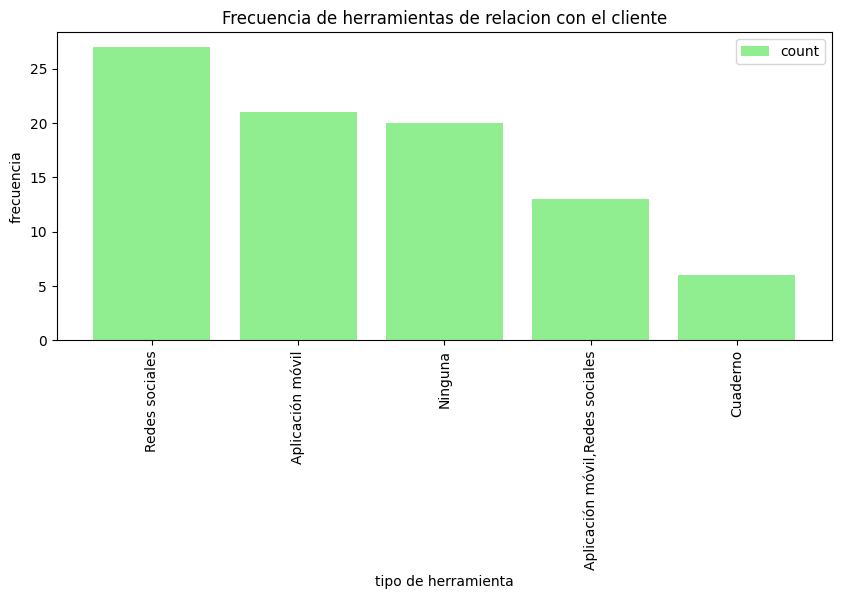

In [12]:
#realizamos un grafico de barras del dataframe filtrado
filtro_index.plot(kind='bar', width=0.8, figsize= (10,4),color = 'lightgreen')
plt.title('Frecuencia de herramientas de relacion con el cliente')
plt.xlabel('tipo de herramienta')
plt.ylabel('frecuencia')

<Axes: xlabel='214_customer_relationship_tools'>

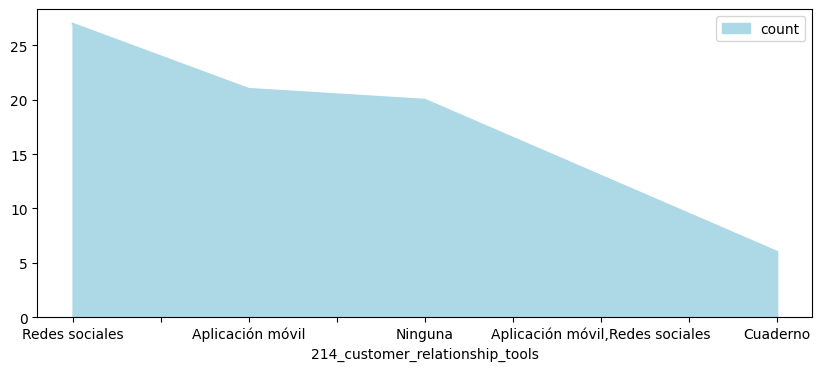

In [13]:
#realizamos grafico de area del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 1, color = 'lightblue')

Text(0.5, 1.0, 'Frecuencia de herramientas de relacion con el cliente')

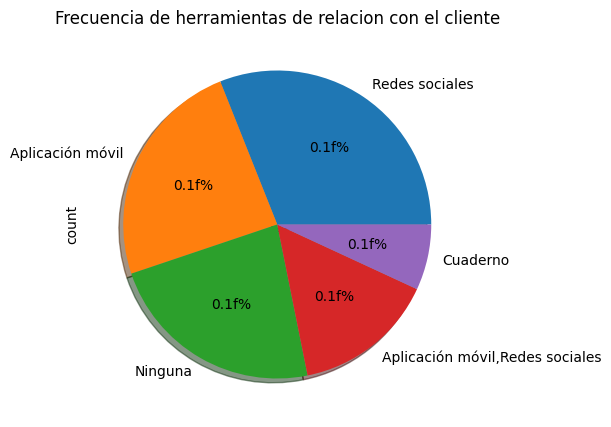

In [15]:
#realizamos grafico de pastel del dataframe filtrado
filtro_index["count"].plot(kind='pie', figsize=(10,5), autopct='0.1f%%', shadow=True)
plt.title('Frecuencia de herramientas de relacion con el cliente')

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADAS 

In [16]:
#Ajustar maximo de filas
pd.options.display.max_rows = None

In [17]:
#corroboramos valores nulos 
valores_nulos=df.isnull().sum()
valores_nulos

_record_id                                                      0
_title                                                          0
_server_updated_at                                              0
_updated_by                                                     0
_geometry                                                       0
_latitude                                                       0
_longitude                                                      0
228_store_name                                                  0
229_store_picture                                               0
232_type_of_store                                               0
108_does_the_micro_retailer_has_a_barred_window_                0
99_does_the_micro_retailer_exhibits_products_outside_           0
102_does_the_micro_retailer_sells_fresh_products_               0
97_number_of_customers_in_store                                 0
268_number_fridges                                              3
184_store_

In [18]:
#calculamos el numero total de la posicion n 
df['_latitude'].count()
n=171

In [19]:
#obtenemos el limite superior y el inferior de columna objetivo 
Max=df['_latitude'].max()
Min=df['_latitude'].min()
limites=[Min,Max]
limites

[np.float64(18.9993095), np.float64(19.0752733)]

In [20]:
#Calculamos el rango R
R=Max-Min
R

np.float64(0.07596380000000025)

In [21]:
#Calculamos el numero de intervalos de Clase "ni",aplicando la regla de Sturges
ni=1+3.32*np.log10(n)
ni

np.float64(8.41354708650195)

CREACIÓN DE CATEGORIAS A PARTIR DE CLASES

In [23]:
#Categorizacion de variables
#declaramos 8 interalos
#ajustamos los limites para que todos los valores se incluyan en intervalos
#ampliamos limites en una unidad sobre decimales menos significativos
#con la intencion de incluir los valores que caigan justo en el limite
intervalos=np.linspace(18.9993094,19.0752734,9)
intervalos


array([18.9993094, 19.0088049, 19.0183004, 19.0277959, 19.0372914,
       19.0467869, 19.0562824, 19.0657779, 19.0752734])

In [24]:
#creamos lista de las  categorias que queremos 
categorias=["categoria 1","categoria 2","categoria 3","categoria 4","categoria 5","categoria 6","categoria 7","categoria 8"]

In [ ]:
#creamos las categorias en la columna numerica
df['_latitude']=pd.cut(x=df['_latitude'], bins=intervalos, labels=categorias)
df['_latitude']

0      categoria 6
1      categoria 6
2      categoria 7
3      categoria 7
4      categoria 7
5      categoria 7
6      categoria 7
7      categoria 7
8      categoria 7
9      categoria 7
10     categoria 3
11     categoria 3
12     categoria 3
13     categoria 3
14     categoria 3
15     categoria 3
16     categoria 3
17     categoria 3
18     categoria 3
19     categoria 3
20     categoria 5
21     categoria 7
22     categoria 7
23     categoria 7
24     categoria 7
25     categoria 7
26     categoria 7
27     categoria 7
28     categoria 7
29     categoria 7
30     categoria 7
31     categoria 7
32     categoria 7
33     categoria 8
34     categoria 4
35     categoria 2
36     categoria 2
37     categoria 2
38     categoria 2
39     categoria 2
40     categoria 3
41     categoria 3
42     categoria 2
43     categoria 3
44     categoria 5
45     categoria 5
46     categoria 3
47     categoria 2
48     categoria 2
49     categoria 2
50     categoria 2
51     categoria 4
52     categ

: 